In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
data = pd.read_csv("dataset.csv")
data = data.drop(['Index'], axis =1)
data.head()

,L1,D1,W1,L2,D2,W2,A2,M1,M2,M3,...,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15
0,56,4.87,0.45,506,0.44,0.25,23,15.90109,81.14046,102.24640,...,503.0457,571.4751,943.9522,1244.580,1369.678,1401.007,1762.824,1943.602,2086.309,2558.577
1,65,7.18,0.35,271,5.37,0.25,47,13.50639,76.61076,94.36555,...,488.0853,567.9029,898.5086,1238.621,1330.465,1353.272,1530.789,1906.431,2058.947,2469.460
2,248,5.51,0.50,361,1.46,0.10,328,16.23756,81.97516,102.06620,...,502.7974,571.1062,910.5368,1252.036,1356.001,1364.529,1758.666,1957.347,2081.241,2510.664
3,371,6.77,0.45,393,4.12,0.15,359,16.32675,82.31082,93.28761,...,486.6037,528.5412,924.8589,1238.695,1323.581,1367.612,1733.544,1917.711,2087.172,2501.153
4,386,5.25,0.35,423,6.09,0.40,16,16.47852,82.52456,94.90102,...,487.7985,553.8937,888.0914,1234.283,1349.795,1375.997,1735.958,1896.219,2093.194,2487.739


In [3]:
data.isnull().sum()

L1      0
D1      0
W1      0
L2      0
D2      0
W2      0
A2      0
M1     33
M2     33
M3     33
M4     33
M5     33
M6     33
M7     33
M8     33
M9     33
M10    33
M11    33
M12    33
M13    33
M14    33
M15    33
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

L1     0
D1     0
W1     0
L2     0
D2     0
W2     0
A2     0
M1     0
M2     0
M3     0
M4     0
M5     0
M6     0
M7     0
M8     0
M9     0
M10    0
M11    0
M12    0
M13    0
M14    0
M15    0
dtype: int64

In [6]:
X = data.iloc[:,7:]
Y = data.iloc[:,0:7]

In [7]:
from sklearn.preprocessing import StandardScaler
def scale_datasets(x, y):
  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler1 = StandardScaler()
  standard_scaler2 = StandardScaler()
  x_scaled = pd.DataFrame(
      standard_scaler1.fit_transform(x),
      columns=x.columns
  )
  y_scaled = pd.DataFrame(
      standard_scaler2.fit_transform(y),
      columns = y.columns
  )
  return x_scaled, x_scaled
x_scaled, y_scaled = scale_datasets(X, Y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled, y_scaled,test_size=0.2,random_state=42)

In [9]:
Y1_train = Y_train.iloc[:,0]
Y2_train = Y_train.iloc[:,1]
Y3_train = Y_train.iloc[:,2]
Y4_train = Y_train.iloc[:,3]
Y5_train = Y_train.iloc[:,4]
Y6_train = Y_train.iloc[:,5]
Y7_train = Y_train.iloc[:,6]

Y1_test = Y_test.iloc[:,0]
Y2_test = Y_test.iloc[:,1]
Y3_test = Y_test.iloc[:,2]
Y4_test = Y_test.iloc[:,3]
Y5_test = Y_test.iloc[:,4]
Y6_test = Y_test.iloc[:,5]
Y7_test = Y_test.iloc[:,6]

# Regression ANN
The simplest definition of an artificial neural network is that it is a model of the human brain, and its fundamental building blocks are artificial neurons. Multi-layer artificial neural networks also have neurons arranged in a way that's analogous to the human brain. Each neuron has a unique set of coefficients that it uses to connect to other neurons. 

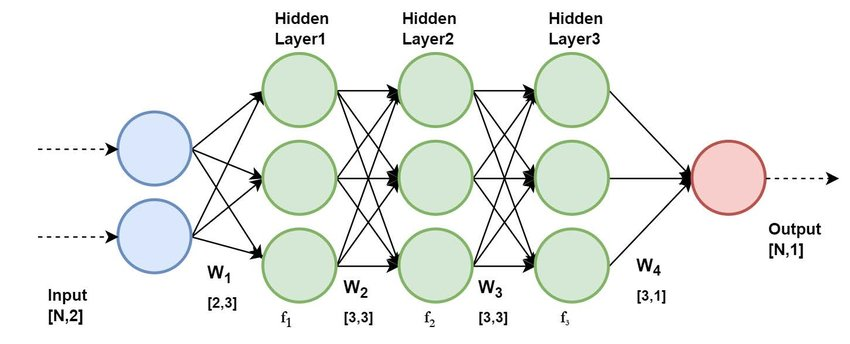

Information like that used in conventional programming is not kept in a single database but rather spread over the entire network. Even if some data disappears in one spot, the network will still function normally. Training involves feeding data to these nodes in order to teach the network something. There is a possibility that, after training, ANNs can generate results based on partially-complete data. The performance hit in this case is proportional to the value of the data that is being withheld. Even if any of an ANN's cells are compromised, the network as a whole can still function and produce results. Because of this improvement, network failures are far less likely to cause disruptions. Because of their computational prowess, artificial neural networks can handle multiple tasks simultaneously. As events occur, artificial neural networks learn and make decisions based on past experiences with similar events.

In [10]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
x_test = X_test.copy()

In [11]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
#model = build_model_using_sequential()

In [12]:
# train the model
model1 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model1.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history1 = model1.fit(
    X_train, 
    Y1_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['L1_prediction'] = model1.predict(x_test)

Epoch 1/100
25/25 [==============================] - 1s 19ms/step - loss: 0.2228 - mean_squared_error: 0.2214 - val_loss: 0.0134 - val_mean_squared_error: 0.0129
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0575 - mean_squared_error: 0.0601 - val_loss: 0.0137 - val_mean_squared_error: 0.0136
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0404 - mean_squared_error: 0.0401 - val_loss: 0.0084 - val_mean_squared_error: 0.0083
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0226 - mean_squared_error: 0.0230 - val_loss: 0.0065 - val_mean_squared_error: 0.0066
Epoch 5/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0072 - val_mean_squared_error: 0.0078
Epoch 6/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0177 - mean_squared_error: 0.0176 - val_loss: 0.0258 - val_mean_squared_error: 0.0247
Epoch 7/100
25/25 [===========

In [13]:
# train the model
model2 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model2.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history2 = model2.fit(
    X_train, 
    Y2_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['D1_prediction'] = model2.predict(x_test)

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.2126 - mean_squared_error: 0.2104 - val_loss: 0.0363 - val_mean_squared_error: 0.0337
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0410 - mean_squared_error: 0.0409 - val_loss: 0.0232 - val_mean_squared_error: 0.0208
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0311 - mean_squared_error: 0.0309 - val_loss: 0.0148 - val_mean_squared_error: 0.0137
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0366 - mean_squared_error: 0.0362 - val_loss: 0.0102 - val_mean_squared_error: 0.0100
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0195 - mean_squared_error: 0.0201 - val_loss: 0.0203 - val_mean_squared_error: 0.0199
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0344 - mean_squared_error: 0.0341 - val_loss: 0.0053 - val_mean_squared_error: 0.0050
Epoch 7/100
25/25 [==============

In [14]:
# train the model
model3 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model3.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history3 = model3.fit(
    X_train, 
    Y3_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['W1_prediction'] = model3.predict(x_test)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.3506 - mean_squared_error: 0.3463 - val_loss: 0.0276 - val_mean_squared_error: 0.0271
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0512 - mean_squared_error: 0.0508 - val_loss: 0.0153 - val_mean_squared_error: 0.0148
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0285 - mean_squared_error: 0.0286 - val_loss: 0.0294 - val_mean_squared_error: 0.0276
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0409 - mean_squared_error: 0.0408 - val_loss: 0.0167 - val_mean_squared_error: 0.0153
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0333 - mean_squared_error: 0.0334 - val_loss: 0.0426 - val_mean_squared_error: 0.0391
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0241 - mean_squared_error: 0.0240 - val_loss: 0.0054 - val_mean_squared_error: 0.0051
Epoch 7/100
25/25 [==============

In [15]:
# train the model
model4 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model4.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history4 = model4.fit(
    X_train, 
    Y4_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['L2_prediction'] = model4.predict(x_test)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.4020 - mean_squared_error: 0.3972 - val_loss: 0.0486 - val_mean_squared_error: 0.0494
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0661 - mean_squared_error: 0.0657 - val_loss: 0.0756 - val_mean_squared_error: 0.0706
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0506 - mean_squared_error: 0.0502 - val_loss: 0.0244 - val_mean_squared_error: 0.0231
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0390 - mean_squared_error: 0.0388 - val_loss: 0.0087 - val_mean_squared_error: 0.0088
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0228 - mean_squared_error: 0.0230 - val_loss: 0.0139 - val_mean_squared_error: 0.0130
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0313 - mean_squared_error: 0.0314 - val_loss: 0.0389 - val_mean_squared_error: 0.0362
Epoch 7/100
25/25 [==============

In [16]:
# train the model
model5 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model5.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history5 = model5.fit(
    X_train, 
    Y5_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['D2_prediction'] = model5.predict(x_test)

Epoch 1/100
25/25 [==============================] - 2s 39ms/step - loss: 0.2723 - mean_squared_error: 0.2690 - val_loss: 0.0440 - val_mean_squared_error: 0.0486
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0469 - mean_squared_error: 0.0468 - val_loss: 0.0131 - val_mean_squared_error: 0.0182
Epoch 3/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0408 - mean_squared_error: 0.0410 - val_loss: 0.0256 - val_mean_squared_error: 0.0261
Epoch 4/100
25/25 [==============================] - 1s 30ms/step - loss: 0.0349 - mean_squared_error: 0.0346 - val_loss: 0.0297 - val_mean_squared_error: 0.0274
Epoch 5/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0294 - mean_squared_error: 0.0292 - val_loss: 0.0122 - val_mean_squared_error: 0.0124
Epoch 6/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0268 - val_mean_squared_error: 0.0257
Epoch 7/100
25/25 [=========

In [17]:
# train the model
model6 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model6.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history6 = model6.fit(
    X_train, 
    Y6_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['W2_prediction'] = model6.predict(x_test)

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.2756 - mean_squared_error: 0.2722 - val_loss: 0.0329 - val_mean_squared_error: 0.0327
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0339 - mean_squared_error: 0.0338 - val_loss: 0.0404 - val_mean_squared_error: 0.0386
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0300 - mean_squared_error: 0.0299 - val_loss: 0.0170 - val_mean_squared_error: 0.0167
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0322 - val_mean_squared_error: 0.0317
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0416 - mean_squared_error: 0.0412 - val_loss: 0.0117 - val_mean_squared_error: 0.0113
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0365 - mean_squared_error: 0.0366 - val_loss: 0.0254 - val_mean_squared_error: 0.0243
Epoch 7/100
25/25 [==============

In [18]:
# train the model
model7 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model7.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history7 = model7.fit(
    X_train, 
    Y7_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['A2_prediction'] = model7.predict(x_test)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.4185 - mean_squared_error: 0.4157 - val_loss: 0.2087 - val_mean_squared_error: 0.1923
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0954 - mean_squared_error: 0.0946 - val_loss: 0.0221 - val_mean_squared_error: 0.0206
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0356 - mean_squared_error: 0.0357 - val_loss: 0.0159 - val_mean_squared_error: 0.0150
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0294 - mean_squared_error: 0.0293 - val_loss: 0.0091 - val_mean_squared_error: 0.0085
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0055 - val_mean_squared_error: 0.0051
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0220 - mean_squared_error: 0.0218 - val_loss: 0.0082 - val_mean_squared_error: 0.0077
Epoch 7/100
25/25 [==============

In [19]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

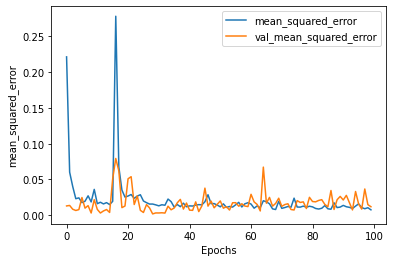

In [20]:
plot_history(history1, 'mean_squared_error')

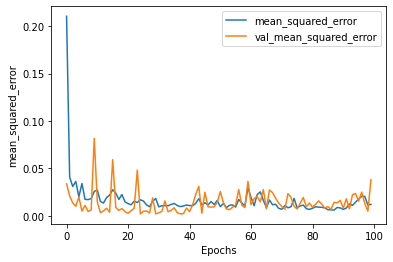

In [21]:
plot_history(history2, 'mean_squared_error')

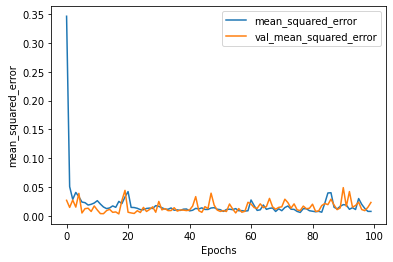

In [22]:
plot_history(history3, 'mean_squared_error')

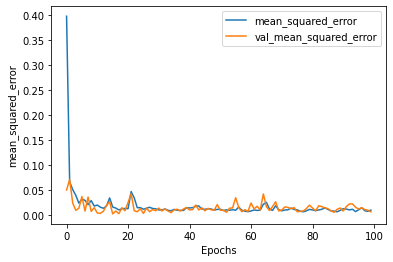

In [23]:
plot_history(history4, 'mean_squared_error')

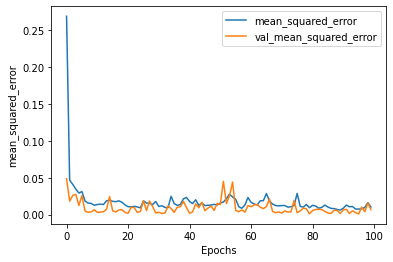

In [24]:
plot_history(history5, 'mean_squared_error')

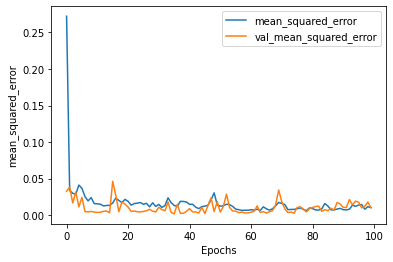

In [25]:
plot_history(history6, 'mean_squared_error')

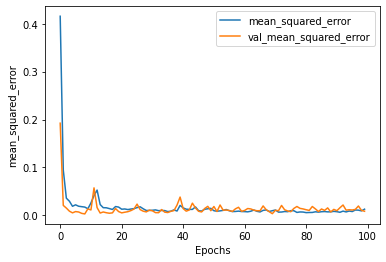

In [26]:
plot_history(history7, 'mean_squared_error')